In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('911_dataset.csv')
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


# Q1. Compute -- What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 presents?

In [16]:
df['zip'].value_counts().head(10)

#Seeing the first 10 zip codes 19446 and 19090 are present.

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
19002.0     8367
19468.0     7860
19046.0     7340
19454.0     7274
19090.0     6999
Name: zip, dtype: int64

# Compute -- What are the top 4 townships (twp) for 911 calls & Question 2: Which of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

In [18]:
df['twp'].value_counts().head(4)
# Analyzing the first 4 townships we can say that Horsham and Lower Pottsgrove are not present.

LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
Name: twp, dtype: int64

# Compute -- Create new features & Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second

In [19]:
df["reason"] = df['title'].str.extract('([A-Z]\w{0,})') #create new column till the : in the description/title
df['reason'].value_counts()

# EMS - 133234
# Traffic - 93400

EMS        133234
Traffic     93400
Fire        39909
Name: reason, dtype: int64

# Compute -- Plot barchart using matplot for 911 calls by Reason & Question 4: How can you plot the bars horizontally?

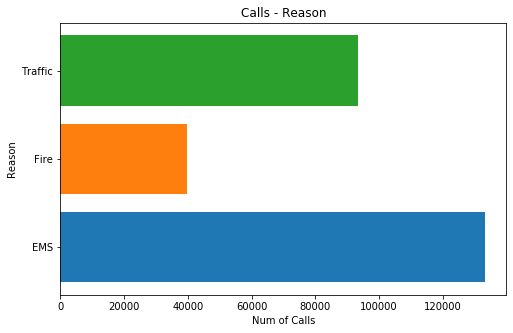

In [10]:
plt.figure(figsize=(8,5))
plt.title("Calls - Reason")
plt.ylabel("Reason")
plt.xlabel("Num of Calls")
for group,data in df.groupby('reason'):
    plt.barh(group,data['reason'].count()) 
    
#bar can be plot horizontally using barh

# Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?

In [20]:
df['day_of_week'] = pd.to_datetime(df['timeStamp']).dt.day_name()
grp = df.groupby(['reason'])
for name, data in grp:
    if(name == 'EMS'):
        print(name)
        print(data['day_of_week'].value_counts())
    
    #from the below table we can see that day of week is Friday and has 19938 calls.

EMS
Friday       19938
Tuesday      19575
Wednesday    19422
Monday       19389
Thursday     19297
Saturday     18229
Sunday       17384
Name: day_of_week, dtype: int64


# Compute -- Create a countplot of the Day of Week column with the hue based of the Reason column & Question 6: On which day traffic calls were lowest?

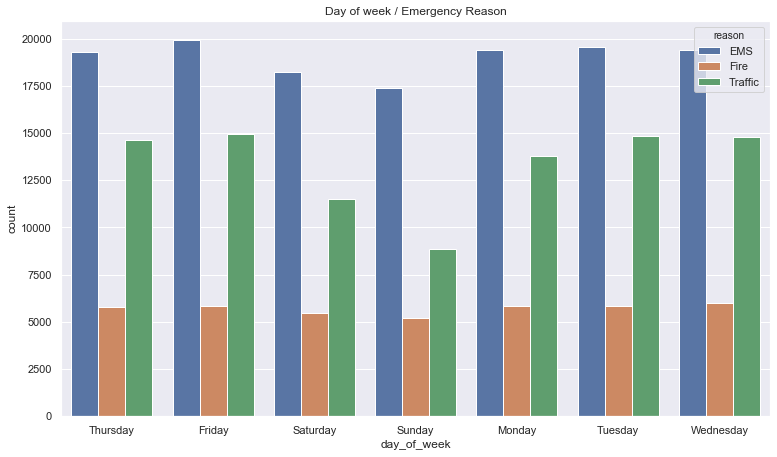

In [22]:
plt.title("Day of week / Emergency Reason")
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.countplot(x=df.day_of_week, hue=df.reason)

#Traffic calls are lowest on Sunday.

# Compute -- Create a countplot month wise -- Question 7: Which month saw highest calls for fire?

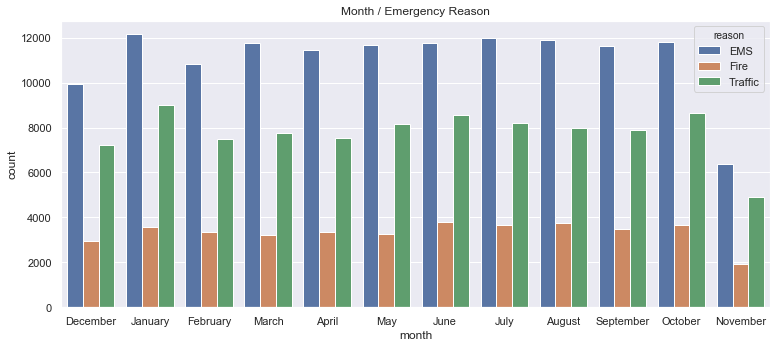

In [13]:
# added a month column to df
df['month'] = pd.to_datetime(df['timeStamp']).dt.month_name()
plt.title("Month / Emergency Reason")
sns.set(rc={'figure.figsize':(14.7,5.27)})
sns.countplot(x=df.month, hue=df.reason)

#Highest calls for fire were in June

# Compute -- Create Web Map for Traffic Calls & Question 8: Why some areas seem to have lower or almost zero traffic calls? Hint: Zoom the map

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium as fo

In [14]:
lng = []
lat = []
lngmean = 0.0
latmean = 0.0
for group,data in df.groupby('reason'):
    if(group == 'Traffic'):
        lng = list(data['lng']) # get all longitudes from where traffic calls came
        lat = list(data['lat'])
        lngmean = data['lng'].mean() # find the mean
        latmean = data['lat'].mean()

map = fo.Map(location=[latmean,lngmean], zoom_start=1, tiles = "Mapbox bright")
fgtc = fo.FeatureGroup(name="Traffic Calls")

for la, lo in zip(lat, lng):
    fgtc.add_child(fo.Marker(location = [la, lo], popup= "Traffic call", icon=fo.Icon(color='red')))


map.add_child(fgtc)
map.add_child(fo.LayerControl())

map.save("traffic_calls.html")

In [ ]:
# There are 93400 traffic calls. The web map is created fine but it does not open due tobeing very heavy to load. I keep getting
# errors are your mac is using too much memory. Please check the code it is correct.